In [5]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' 

In [6]:
import cv2

In [7]:
img=cv2.imread('temp/bw_image_2.jpg')

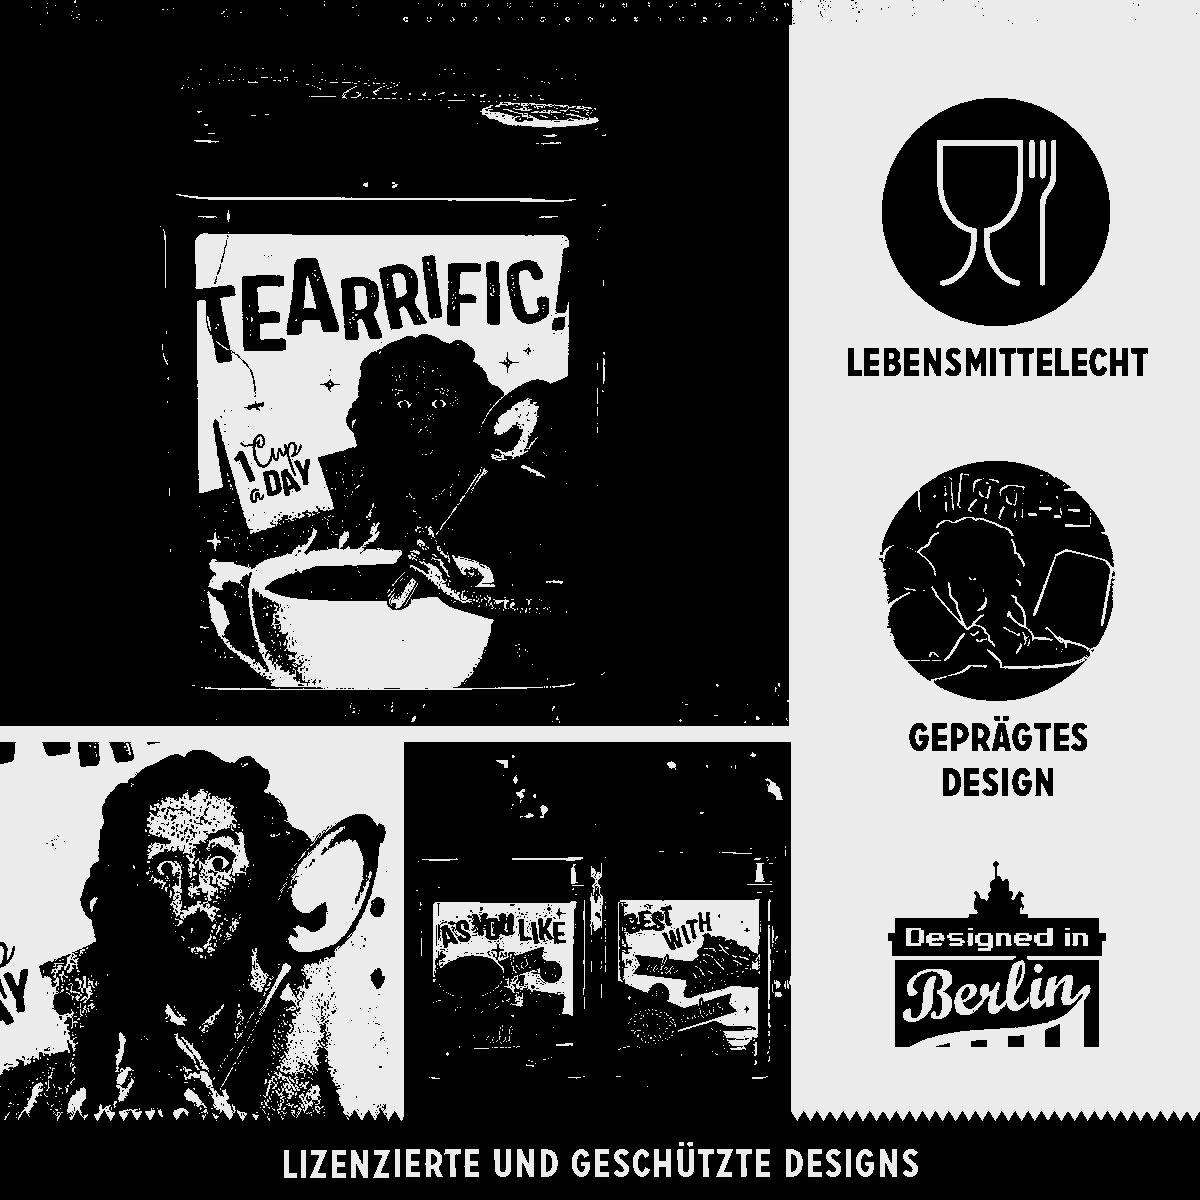

In [8]:
from PIL import Image
from IPython.display import display

# Load the image
img = Image.open("temp/bw_image_2.jpg")

# Display the image inline in Jupyter notebook
display(img)


In [15]:
img=cv2.imread('temp/bw_image_2.jpg')

In [10]:
print(pytesseract.image_to_string(img))

LEBENSMITTELECHT

GEPRAGTES
DESIGN

Designed in

LIZENZIERTE UND GESCHUTZTE DESIGNS



In [11]:
print(pytesseract.image_to_boxes(img))

L 848 824 862 852 0
E 864 824 879 852 0
B 884 824 901 852 0
E 904 824 919 852 0
N 924 824 941 852 0
S 945 824 961 852 0
M 966 824 986 852 0
I 990 824 996 852 0
T 999 824 1016 852 0
T 1017 824 1034 852 0
E 1037 824 1052 852 0
L 1055 824 1069 852 0
E 1072 824 1087 852 0
C 1089 824 1107 852 0
H 1110 824 1128 852 0
T 1131 824 1148 852 0
G 909 449 929 477 0
E 932 449 947 477 0
P 951 449 969 477 0
R 972 449 990 477 0
A 992 449 1011 484 0
G 1012 449 1032 477 0
T 1034 449 1051 477 0
E 1054 449 1069 477 0
S 1071 449 1087 477 0
D 943 404 961 432 0
E 964 404 979 432 0
S 982 404 998 432 0
I 1002 404 1008 432 0
G 1012 404 1032 432 0
N 1035 404 1053 432 0
D 906 254 924 272 0
e 926 254 945 267 0
s 947 254 965 267 0
i 967 254 973 272 0
g 975 249 993 267 0
n 996 254 1012 267 0
e 1014 254 1032 267 0
d 1034 254 1053 272 0
i 1065 254 1070 272 0
n 1072 254 1088 267 0
~ 0 74 1200 1200 0
L 284 22 297 50 0
I 301 22 327 50 0
Z 319 22 338 51 0
E 332 22 346 50 0
N 351 22 368 50 0
Z 373 22 390 50 0
I 395 23 400 5

In [16]:
hImg,wImg,_=img.shape

In [23]:
boxes=pytesseract.image_to_boxes(img)
# this is how we can get bounding bixes on each
for b in boxes.splitlines():
    b=b.split(' ')
    x,y,w,h=int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),1)
    # for putting text
    # to bring text a little down I added 100
    # 50,50,255 is color 2 is thickness
    cv2.putText(img,b[0],(x,hImg-y+100),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
    

In [24]:
cv2.imshow('Result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Detecting Words

In [34]:
hImg,wImg,_=img.shape

In [35]:
boxes=pytesseract.image_to_data(img)
print(boxes)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1200	1200	-1	
2	1	1	0	0	0	0	0	1200	1182	-1	
3	1	1	1	0	0	0	0	1200	1182	-1	
4	1	1	1	1	0	0	0	1200	1182	-1	
5	1	1	1	1	1	0	0	1200	1182	95.000000	 



In [31]:
for x,b in enumerate(boxes.splitlines()):
    b=b.split()
    print(b)
    

['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
['1', '1', '0', '0', '0', '0', '0', '0', '1200', '1200', '-1']
['2', '1', '1', '0', '0', '0', '0', '0', '1200', '1182', '-1']
['3', '1', '1', '1', '0', '0', '0', '0', '1200', '1182', '-1']
['4', '1', '1', '1', '1', '0', '0', '0', '1200', '1182', '-1']
['5', '1', '1', '1', '1', '1', '0', '0', '1200', '1182', '95.000000']


In [41]:
# iN my case I cant see any text, but in his case
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b=b.split()
        print(b)
        if len(b)==12:
            x,y,w,h=int(b[6]),int(b[7]),int(b[8]),int(b[9]);
            cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),3)
            cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
    
            
    

['1', '1', '0', '0', '0', '0', '0', '0', '1200', '1200', '-1']
['2', '1', '1', '0', '0', '0', '0', '0', '1200', '1182', '-1']
['3', '1', '1', '1', '0', '0', '0', '0', '1200', '1182', '-1']
['4', '1', '1', '1', '1', '0', '0', '0', '1200', '1182', '-1']
['5', '1', '1', '1', '1', '1', '0', '0', '1200', '1182', '95.000000']


In [42]:
cv2.imshow('Result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
import cv2
import pytesseract
import numpy as np
from pytesseract import Output

# Load the image using OpenCV
image = cv2.imread(r'images/617Tl40LOXL.jpg')

# Preprocess the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
gray = cv2.medianBlur(gray, 3)

# Detect skew and rotate the image
coords = np.column_stack(np.where(gray > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Perform OCR on the rotated image
text = pytesseract.image_to_string(rotated)

print("Recognized Text:\n", text)


Recognized Text:
 HIGH STRENGT

PSYLLIUM

PLANTAGO O'
1400mc PLANT —




In [47]:
cv2.imwrite('temp/modifiedimage.jpg',rotated)

True

In [49]:
import easyocr

ModuleNotFoundError: No module named 'easyocr'